In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob
from csv import reader

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/')
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/'
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Rhodhopsin/'
matplotlib.__version__

'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:
O2=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Energy_pathways/Oxidative phosphorylation_transcripts_per_cell_all_genera.csv')
O2=O2.rename(columns={'metabolism_transcripts_per_cell':'Oxidative_phosphorylation_transcripts_per_cell'})
O2


,genus,date,Oxidative_phosphorylation_transcripts_per_cell
0,AAA164-E04,20171102,2.502512
1,AAA164-E04,20181030,0.951484
2,AAA164-E04,20190402,3.647007
3,AAA164-E04,20190709,1.044251
4,AAA536-G10,20171102,4.270014
...,...,...,...
596,Winogradskyella,20190709,0.050115
597,Yoonia,20171102,9.042120
598,Yoonia,20181030,1.366650
599,Yoonia,20190402,0.608685


Something to test use a T-test to test if the avg rhodhopsin transcripts per cell below RSG detection are greater than the avg rhodhopsin transcripts per cell for genera above the RSG threshold.

In [3]:
cols=['date', 'genus', 'cytochrome_c_oxidase_transcripts_per_cell']
gene_copies=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Energy_pathways/Gene_transcripts_per_cell.csv',
                       usecols=cols)
gene_copies

,genus,date,cytochrome_c_oxidase_transcripts_per_cell
0,AAA164-E04,20171102,0.000000
1,AAA164-E04,20181030,0.140961
2,AAA164-E04,20190402,0.000000
3,AAA164-E04,20190709,0.000000
4,AAA536-G10,20171102,NaN
...,...,...,...
512,Winogradskyella,20190402,0.087925
513,Winogradskyella,20190709,0.000000
514,Yoonia,20171102,0.968799
515,Yoonia,20181030,0.136665


In [4]:
#### T-test rhodhopsin transcripts above and below O2 consumption thresholds

# arbitrary O2 values  0.0023115178181818178 0.0023690152954545453 0.002253796421052631

# Think about limiting to 10 SAG genera to try and reduce small number biases.

from scipy import stats
cols=['proteorhodopsin_transcripts_per_cell', 'Weighted_avg_O2_consumed_per_cell', 'genus', 'date', '#_of_cells']
data=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/rRNA/rRNA_O2_transcripts_stats_all_genera.csv', 
                 usecols=cols)
#data=data.iloc[: , 1:]
data=data[data['date'] != 20171102]

#Remove all genera that have <5 cells across all timepoints
data=data[data['#_of_cells'] >=5]
data=data[data['proteorhodopsin_transcripts_per_cell'] !=0]

data=data.merge(O2, how='left', on=['genus', 'date'])
data=data.merge(gene_copies, how='left', on=['genus', 'date'])


Threshold=0.0023690152954545453
Middle=0.01

below=data[data['Weighted_avg_O2_consumed_per_cell'] <= Threshold]
above=data[data['Weighted_avg_O2_consumed_per_cell'] > Threshold]
high=above[above['Weighted_avg_O2_consumed_per_cell'] >= Middle]
mid=above[above['Weighted_avg_O2_consumed_per_cell'] < Middle]


below_rhod=below[['proteorhodopsin_transcripts_per_cell']].copy()
below_rhod=below_rhod.dropna()
#drop the any genus where the number of rhodhopsin transcripts is 0. This can be debated as to whether or not that this is the correct methodology 
below_rhod=below_rhod[below_rhod['proteorhodopsin_transcripts_per_cell'] !=0]

below_O2=below[['Oxidative_phosphorylation_transcripts_per_cell']].copy()
below_O2=below_O2.dropna()
below_O2=below_O2[below_O2['Oxidative_phosphorylation_transcripts_per_cell'] !=0]

below_cytC=below[['cytochrome_c_oxidase_transcripts_per_cell']].copy()
below_cytC=below_cytC.dropna()
below_cytC=below_cytC[below_cytC['cytochrome_c_oxidase_transcripts_per_cell'] !=0]


above_rhod=above[['proteorhodopsin_transcripts_per_cell']].copy()
above_rhod=above_rhod.dropna()
#drop the any genus where the number of rhodhopsin transcripts is 0. This can be debated as to whether or not that this is the correct methodology 
above_rhod=above_rhod[above_rhod['proteorhodopsin_transcripts_per_cell'] !=0]

above_O2=above[['Oxidative_phosphorylation_transcripts_per_cell']].copy()
above_O2=above_O2.dropna()
above_O2=above_O2[above_O2['Oxidative_phosphorylation_transcripts_per_cell'] !=0]

above_cytC=above[['cytochrome_c_oxidase_transcripts_per_cell']].copy()
above_cytC=above_cytC.dropna()
above_cytC=above_cytC[above_cytC['cytochrome_c_oxidase_transcripts_per_cell'] !=0]


high_rhod=high[['proteorhodopsin_transcripts_per_cell']].copy()
high_rhod=high_rhod.dropna()
#drop the any genus where the number of rhodhopsin transcripts is 0. This can be debated as to whether or not that this is the correct methodology 
high_rhod=high_rhod[high_rhod['proteorhodopsin_transcripts_per_cell'] !=0]

high_O2=high[['Oxidative_phosphorylation_transcripts_per_cell']].copy()
high_O2=high_O2.dropna()
high_O2=high_O2[high_O2['Oxidative_phosphorylation_transcripts_per_cell'] !=0]

high_cytC=high[['cytochrome_c_oxidase_transcripts_per_cell']].copy()
high_cytC=high_cytC.dropna()
high_cytC=high_cytC[high_cytC['cytochrome_c_oxidase_transcripts_per_cell'] !=0]


mid_rhod=mid[['proteorhodopsin_transcripts_per_cell']].copy()
mid_rhod=mid_rhod.dropna()
#drop the any genus where the number of rhodhopsin transcripts is 0. This can be debated as to whether or not that this is the correct methodology 
mid_rhod=mid_rhod[mid_rhod['proteorhodopsin_transcripts_per_cell'] !=0]

mid_O2=mid[['Oxidative_phosphorylation_transcripts_per_cell']].copy()
mid_O2=mid_O2.dropna()
mid_O2=mid_O2[mid_O2['Oxidative_phosphorylation_transcripts_per_cell'] !=0]

mid_cytC=mid[['cytochrome_c_oxidase_transcripts_per_cell']].copy()
mid_cytC=mid_cytC.dropna()
mid_cytC=mid_cytC[mid_cytC['cytochrome_c_oxidase_transcripts_per_cell'] !=0]

data

,genus,date,Weighted_avg_O2_consumed_per_cell,#_of_cells,proteorhodopsin_transcripts_per_cell,Oxidative_phosphorylation_transcripts_per_cell,cytochrome_c_oxidase_transcripts_per_cell
0,AAA164-E04,20181030,0.002312,37.0,NaN,0.951484,0.140961
1,AAA164-E04,20190402,0.002369,37.0,NaN,3.647007,0.000000
2,AAA164-E04,20190709,0.002254,37.0,NaN,1.044251,0.000000
3,AAA536-G10,20181030,0.003447,48.0,0.339367,0.870376,NaN
4,AAA536-G10,20190402,0.004543,48.0,1.697749,1.374025,NaN
...,...,...,...,...,...,...,...
285,Winogradskyella,20190402,0.002369,9.0,0.205159,0.166081,0.087925
286,Winogradskyella,20190709,0.002254,9.0,0.083524,0.050115,0.000000
287,Yoonia,20181030,0.002312,6.0,NaN,1.366650,0.136665
288,Yoonia,20190402,0.002369,6.0,NaN,0.608685,0.008009


In [5]:
print('t-test of rhodopsin transcript abundance in cells above and below the RSG detection threshold  \n')
print('above detection avg', above_rhod.mean())
print('below detection avg', below_rhod.mean())
tStat, pValue =  stats.ttest_ind(above_rhod, below_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('high O2 avg', high_rhod.mean())
print('below detection avg', below_rhod.mean())
tStat, pValue =  stats.ttest_ind(high_rhod, below_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('high O2 avg', high_rhod.mean())
print('middle O2 avg', mid_rhod.mean())
tStat, pValue =  stats.ttest_ind(high_rhod, mid_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('middle O2 avg', mid_rhod.mean())
print('below detection avg', below_rhod.mean())
tStat, pValue =  stats.ttest_ind(mid_rhod, below_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic


t-test of rhodopsin transcript abundance in cells above and below the RSG detection threshold  

above detection avg proteorhodopsin_transcripts_per_cell    0.277602
dtype: float64
below detection avg proteorhodopsin_transcripts_per_cell    0.438023
dtype: float64
P-Value:[0.0302998] T-Statistic:[-2.18057867] 

high O2 avg proteorhodopsin_transcripts_per_cell    0.17778
dtype: float64
below detection avg proteorhodopsin_transcripts_per_cell    0.438023
dtype: float64
P-Value:[0.03970495] T-Statistic:[-2.07313247] 

high O2 avg proteorhodopsin_transcripts_per_cell    0.17778
dtype: float64
middle O2 avg proteorhodopsin_transcripts_per_cell    0.318345
dtype: float64
P-Value:[0.15184647] T-Statistic:[-1.44955881] 

middle O2 avg proteorhodopsin_transcripts_per_cell    0.318345
dtype: float64
below detection avg proteorhodopsin_transcripts_per_cell    0.438023
dtype: float64
P-Value:[0.16891428] T-Statistic:[-1.38082181] 



Should I consider running a rhodhopsin expression t-test at the class level? every class against every other class?


In [6]:
print('t-test of O2 pathway transcript abundance in cells above and below the RSG detection threshold  \n')

print('above detection avg', above_O2.mean())
print('below detection avg', below_O2.mean())
tStat, pValue =  stats.ttest_ind(above_O2, below_O2)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('high O2 avg', high_O2.mean())
print('below detection avg', below_O2.mean())
tStat, pValue =  stats.ttest_ind(high_O2, below_O2)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('high O2 avg', high_O2.mean())
print('middle O2 avg', mid_O2.mean())
tStat, pValue =  stats.ttest_ind(high_O2, mid_O2)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('middle O2 avg', mid_O2.mean())
print('below detection avg', below_O2.mean())
tStat, pValue =  stats.ttest_ind(mid_O2, below_O2)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic


t-test of O2 pathway transcript abundance in cells above and below the RSG detection threshold  

above detection avg Oxidative_phosphorylation_transcripts_per_cell    0.726137
dtype: float64
below detection avg Oxidative_phosphorylation_transcripts_per_cell    5.357295
dtype: float64
P-Value:[0.03671761] T-Statistic:[-2.10029008] 

high O2 avg Oxidative_phosphorylation_transcripts_per_cell    0.439372
dtype: float64
below detection avg Oxidative_phosphorylation_transcripts_per_cell    5.357295
dtype: float64
P-Value:[0.22938604] T-Statistic:[-1.2056079] 

high O2 avg Oxidative_phosphorylation_transcripts_per_cell    0.439372
dtype: float64
middle O2 avg Oxidative_phosphorylation_transcripts_per_cell    0.844584
dtype: float64
P-Value:[0.21095248] T-Statistic:[-1.2638161] 

middle O2 avg Oxidative_phosphorylation_transcripts_per_cell    0.844584
dtype: float64
below detection avg Oxidative_phosphorylation_transcripts_per_cell    5.357295
dtype: float64
P-Value:[0.08656798] T-Statistic:

In [7]:
print('t-test of average Cytochrome C transcript abundance in cells above and below the RSG detection threshold  \n')

print('above O2 detection avg', above_cytC.mean())
print('below O2 detection avg', below_cytC.mean())
tStat, pValue =  stats.ttest_ind(above_cytC, below_cytC)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('high O2 avg', high_cytC.mean())
print('below O2 detection avg', below_cytC.mean())
tStat, pValue =  stats.ttest_ind(high_cytC, below_cytC)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('high O2 avg', high_cytC.mean())
print('middle O2 avg', mid_cytC.mean())
tStat, pValue =  stats.ttest_ind(high_cytC, mid_cytC)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print('middle O2 avg', mid_cytC.mean())
print('below O2 detection avg', below_cytC.mean())
tStat, pValue =  stats.ttest_ind(mid_cytC, below_cytC)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic


t-test of average Cytochrome C transcript abundance in cells above and below the RSG detection threshold  

above O2 detection avg cytochrome_c_oxidase_transcripts_per_cell    0.065961
dtype: float64
below O2 detection avg cytochrome_c_oxidase_transcripts_per_cell    0.187771
dtype: float64
P-Value:[0.00336891] T-Statistic:[-2.99161509] 

high O2 avg cytochrome_c_oxidase_transcripts_per_cell    0.087542
dtype: float64
below O2 detection avg cytochrome_c_oxidase_transcripts_per_cell    0.187771
dtype: float64
P-Value:[0.13577418] T-Statistic:[-1.5039641] 

high O2 avg cytochrome_c_oxidase_transcripts_per_cell    0.087542
dtype: float64
middle O2 avg cytochrome_c_oxidase_transcripts_per_cell    0.053629
dtype: float64
P-Value:[0.35243756] T-Statistic:[0.94406327] 

middle O2 avg cytochrome_c_oxidase_transcripts_per_cell    0.053629
dtype: float64
below O2 detection avg cytochrome_c_oxidase_transcripts_per_cell    0.187771
dtype: float64
P-Value:[0.00857852] T-Statistic:[-2.67736464] 



### That is not what I had hoped to see
the Rhodhopsin transcript looks at least somewhat promising but for some reason the below detection genera have much higher expression of Oxidative pathway transcripts and cytochrome C than the ones that are above detection (aka that are consuming O2) Should I look into doing this as a percent?

### That being said
as the Moran paper shows pretty well mRNA abundance does not equate to differences in protein abundnace, much less protein activity. 
No I am somewhat trying to have it both ways with there is a difference with the rhodopsin but the difference does not matter for the cytC abundance

In [8]:
# look into creating a bar chart using the below values

print('t-test of rhodopsin transcript abundance in cells above and below the RSG detection threshold  \n')
print('above detection avg', above_rhod.mean())
print('below detection avg', below_rhod.mean())
tStat, pValue =  stats.ttest_ind(above_rhod, below_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic



t-test of rhodopsin transcript abundance in cells above and below the RSG detection threshold  

above detection avg proteorhodopsin_transcripts_per_cell    0.277602
dtype: float64
below detection avg proteorhodopsin_transcripts_per_cell    0.438023
dtype: float64
P-Value:[0.0302998] T-Statistic:[-2.18057867] 



In [9]:
above_rhod['fraction']='above O2 detection limit'
below_rhod['fraction']='below O2 detection limit'
rhod=pd.concat([above_rhod, below_rhod])
rhod

,proteorhodopsin_transcripts_per_cell,fraction
3,0.339367,above O2 detection limit
4,1.697749,above O2 detection limit
6,0.274058,above O2 detection limit
10,0.340152,above O2 detection limit
13,0.660194,above O2 detection limit
...,...,...
278,0.244292,below O2 detection limit
279,0.283614,below O2 detection limit
284,0.236236,below O2 detection limit
285,0.205159,below O2 detection limit


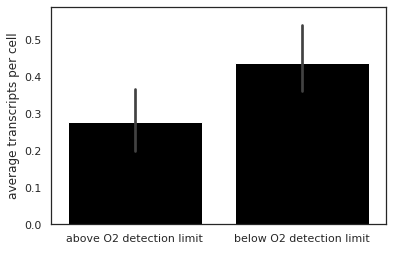

In [10]:

avg=[['above O2 detection limit', 0.277602], ['below O2 detyection limit', 0.438023]]
Rhodopsin=pd.DataFrame(avg, columns=['fraction', 'average_transcripts_per_cell'])
Rhodopsin


sns.set_style("white")
fig, ax = plt.subplots()

rhod_plot=sns.barplot(data=rhod, x='fraction', y='proteorhodopsin_transcripts_per_cell', color="black", ci=95)
ax.set(ylabel='average transcripts per cell')
ax.set(xlabel=' ')
ax.set(ylim=(0,0.59))
#ax.set(xlabel='O2 fraction')
fig=rhod_plot.get_figure()
fig.savefig(images+'Rhodopsin_transcripts_above_and_below_O2_detection_limit')


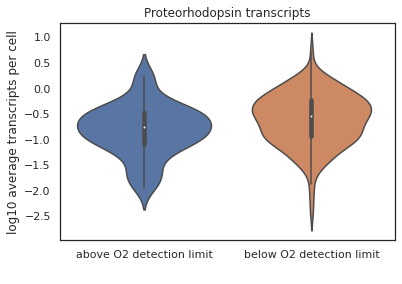

In [11]:
rhod['log_transcripts']=np.log10(rhod['proteorhodopsin_transcripts_per_cell'])
fig, ax = plt.subplots()
sns.set_style("white")
violin_plt=sns.violinplot(data=rhod, x='fraction', y='log_transcripts')


ax.set(ylabel='log10 average transcripts per cell')
ax.set(xlabel=' ')
ax.set_title('Proteorhodopsin transcripts')
fig=violin_plt.get_figure()
fig.savefig(images+'Violinplot_Rhodopsin_transcripts_above_and_below_O2_detection_limit')

In [12]:
rhod

,proteorhodopsin_transcripts_per_cell,fraction,log_transcripts
3,0.339367,above O2 detection limit,-0.469331
4,1.697749,above O2 detection limit,0.229873
6,0.274058,above O2 detection limit,-0.562158
10,0.340152,above O2 detection limit,-0.468327
13,0.660194,above O2 detection limit,-0.180328
...,...,...,...
278,0.244292,below O2 detection limit,-0.612090
279,0.283614,below O2 detection limit,-0.547272
284,0.236236,below O2 detection limit,-0.626654
285,0.205159,below O2 detection limit,-0.687909


In [13]:
cols=['genus', 'spherical cell volume (µm3)']

volume=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Supplemental_table_genus_statistics_light_metabolism_volume.csv',
                  usecols=cols)
volume

,genus,spherical cell volume (µm3)
0,Pelagibacter,0.014137
1,SW10,0.375377
2,SCGC-AAA076-P13,0.016366
3,D2472,0.024429
4,Amylibacter,0.082448
...,...,...
298,UBA974,0.073622
299,NaN,3.764181
300,Vibrio,0.860290
301,ZODW24,0.187402


In [14]:
data

,genus,date,Weighted_avg_O2_consumed_per_cell,#_of_cells,proteorhodopsin_transcripts_per_cell,Oxidative_phosphorylation_transcripts_per_cell,cytochrome_c_oxidase_transcripts_per_cell
0,AAA164-E04,20181030,0.002312,37.0,NaN,0.951484,0.140961
1,AAA164-E04,20190402,0.002369,37.0,NaN,3.647007,0.000000
2,AAA164-E04,20190709,0.002254,37.0,NaN,1.044251,0.000000
3,AAA536-G10,20181030,0.003447,48.0,0.339367,0.870376,NaN
4,AAA536-G10,20190402,0.004543,48.0,1.697749,1.374025,NaN
...,...,...,...,...,...,...,...
285,Winogradskyella,20190402,0.002369,9.0,0.205159,0.166081,0.087925
286,Winogradskyella,20190709,0.002254,9.0,0.083524,0.050115,0.000000
287,Yoonia,20181030,0.002312,6.0,NaN,1.366650,0.136665
288,Yoonia,20190402,0.002369,6.0,NaN,0.608685,0.008009


In [15]:
data=data.merge(volume, on='genus')
data['rhodopsin_transcripts_per_µm3']=data['proteorhodopsin_transcripts_per_cell']/data['spherical cell volume (µm3)']

data

,genus,date,Weighted_avg_O2_consumed_per_cell,#_of_cells,proteorhodopsin_transcripts_per_cell,Oxidative_phosphorylation_transcripts_per_cell,cytochrome_c_oxidase_transcripts_per_cell,spherical cell volume (µm3),rhodopsin_transcripts_per_µm3
0,AAA164-E04,20181030,0.002312,37.0,NaN,0.951484,0.140961,0.623615,NaN
1,AAA164-E04,20190402,0.002369,37.0,NaN,3.647007,0.000000,0.623615,NaN
2,AAA164-E04,20190709,0.002254,37.0,NaN,1.044251,0.000000,0.623615,NaN
3,AAA536-G10,20181030,0.003447,48.0,0.339367,0.870376,NaN,0.087114,3.895675
4,AAA536-G10,20190402,0.004543,48.0,1.697749,1.374025,NaN,0.087114,19.488872
...,...,...,...,...,...,...,...,...,...
271,Winogradskyella,20190402,0.002369,9.0,0.205159,0.166081,0.087925,0.369121,0.555805
272,Winogradskyella,20190709,0.002254,9.0,0.083524,0.050115,0.000000,0.369121,0.226279
273,Yoonia,20181030,0.002312,6.0,NaN,1.366650,0.136665,0.333038,NaN
274,Yoonia,20190402,0.002369,6.0,NaN,0.608685,0.008009,0.333038,NaN


In [16]:
bins=[0.001, 0.0023690152954545453, 0.01, 0.1, 10]
labels=['below_detection', 'low', 'mid', 'high']
data['O2_fraction'] = pd.cut(data['Weighted_avg_O2_consumed_per_cell'], bins=bins, labels=labels)

data.drop(labels=['Oxidative_phosphorylation_transcripts_per_cell', 'cytochrome_c_oxidase_transcripts_per_cell', '#_of_cells'], 
          axis=1, inplace=True)

data

,genus,date,Weighted_avg_O2_consumed_per_cell,proteorhodopsin_transcripts_per_cell,spherical cell volume (µm3),rhodopsin_transcripts_per_µm3,O2_fraction
0,AAA164-E04,20181030,0.002312,NaN,0.623615,NaN,below_detection
1,AAA164-E04,20190402,0.002369,NaN,0.623615,NaN,below_detection
2,AAA164-E04,20190709,0.002254,NaN,0.623615,NaN,below_detection
3,AAA536-G10,20181030,0.003447,0.339367,0.087114,3.895675,low
4,AAA536-G10,20190402,0.004543,1.697749,0.087114,19.488872,low
...,...,...,...,...,...,...,...
271,Winogradskyella,20190402,0.002369,0.205159,0.369121,0.555805,below_detection
272,Winogradskyella,20190709,0.002254,0.083524,0.369121,0.226279,below_detection
273,Yoonia,20181030,0.002312,NaN,0.333038,NaN,below_detection
274,Yoonia,20190402,0.002369,NaN,0.333038,NaN,below_detection


In [17]:
data.dropna(how='any', inplace=True)
data.drop_duplicates(inplace=True)
data.head(12)

,genus,date,Weighted_avg_O2_consumed_per_cell,proteorhodopsin_transcripts_per_cell,spherical cell volume (µm3),rhodopsin_transcripts_per_µm3,O2_fraction
3,AAA536-G10,20181030,0.003447,0.339367,0.087114,3.895675,low
4,AAA536-G10,20190402,0.004543,1.697749,0.087114,19.488872,low
5,AAA536-G10,20190709,0.002254,0.677222,0.087114,7.773998,below_detection
6,AG-337-I02,20181030,0.010500,0.274058,0.034783,7.879129,mid
7,AG-337-I02,20190402,0.002369,0.096356,0.034783,2.770216,below_detection
8,AG-337-I02,20190709,0.002254,0.357267,0.034783,10.271391,below_detection
10,ASP10-02a,20190402,1.178431,0.660194,0.084759,7.789033,high
11,ASP10-02a,20190709,0.002254,0.553846,0.084759,6.534332,below_detection
14,Amylibacter,20181030,0.032508,0.114177,0.082448,1.384834,mid
15,Amylibacter,20190402,0.051412,0.278077,0.082448,3.372752,mid


In [18]:
below_detection_rhod=data.where(data.O2_fraction=='below_detection').dropna()['rhodopsin_transcripts_per_µm3']
# 'low', 'mid', 'high'
low_rhod=data.where(data.O2_fraction=='low').dropna()['rhodopsin_transcripts_per_µm3']

mid_rhod=data.where(data.O2_fraction=='mid').dropna()['rhodopsin_transcripts_per_µm3']

high_rhod=data.where(data.O2_fraction=='high').dropna()['rhodopsin_transcripts_per_µm3']


above_rhod=pd.concat([low_rhod, mid_rhod, high_rhod])

above_rhod

3       3.895675
4      19.488872
18      8.060350
24      8.767650
30      7.855971
         ...    
10      7.789033
142     0.311096
143     1.231693
144     0.325061
167     2.292743
Name: rhodopsin_transcripts_per_µm3, Length: 65, dtype: float64

In [19]:


#BELOW
print('t-test of rhodopsin transcript abundance in cells below the RSG detection threshold and low consumers  \n')
tStat, pValue =  stats.ttest_ind(below_detection_rhod, low_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic
print('t-test of rhodopsin transcript abundance in cells below the RSG detection threshold and mid consumers  \n')
tStat, pValue =  stats.ttest_ind(below_detection_rhod, mid_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic
print('t-test of rhodopsin transcript abundance in cells below the RSG detection threshold and high consumers  \n')
tStat, pValue =  stats.ttest_ind(below_detection_rhod, high_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

#LOW
print('t-test of rhodopsin transcript abundance in cells with low O2 consumption and mid consumers  \n')
tStat, pValue =  stats.ttest_ind(low_rhod, high_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic
print('t-test of rhodopsin transcript abundance in cells with low O2 consumption and high consumers  \n')
tStat, pValue =  stats.ttest_ind(low_rhod, mid_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic


#MID
print('t-test of rhodopsin transcript abundance in cells with mid O2 consumption and high consumers  \n')
tStat, pValue =  stats.ttest_ind(mid_rhod, high_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic


#ABOVE v BELOW
print('t-test of rhodopsin transcript abundance in cells above and below the O2 detection limit \n')
tStat, pValue =  stats.ttest_ind(below_detection_rhod, above_rhod)
print("P-Value:{0} T-Statistic:{1} \n".format(pValue,tStat)) #print the P-Value and the T-Statistic

print(len(below_detection_rhod))
print(len(low_rhod))
print(len(mid_rhod))
print(len(high_rhod))

t-test of rhodopsin transcript abundance in cells below the RSG detection threshold and low consumers  

P-Value:0.30574766283124066 T-Statistic:1.0270762329376908 

t-test of rhodopsin transcript abundance in cells below the RSG detection threshold and mid consumers  

P-Value:0.1224058339176642 T-Statistic:1.5534060051894893 

t-test of rhodopsin transcript abundance in cells below the RSG detection threshold and high consumers  

P-Value:0.3585901842223814 T-Statistic:0.9210428467141827 

t-test of rhodopsin transcript abundance in cells with low O2 consumption and mid consumers  

P-Value:0.3552356667132942 T-Statistic:0.9334970470938733 

t-test of rhodopsin transcript abundance in cells with low O2 consumption and high consumers  

P-Value:0.12644729876414532 T-Statistic:1.5505589911223254 

t-test of rhodopsin transcript abundance in cells with mid O2 consumption and high consumers  

P-Value:0.7014841669166233 T-Statistic:0.3894890414976532 

t-test of rhodopsin transcript abun

In [20]:
import scipy.stats as stats


### Recheck the significance with a Mann Whitney U test

#BELOW
print('Mann-Whitney U test of rhodopsin transcript abundance in cells below the RSG detection threshold and low consumers ')
print(stats.mannwhitneyu(below_detection_rhod, low_rhod),'\n')

print('Mann-Whitney U test of rhodopsin transcript abundance in cells below the RSG detection threshold and mid consumers ')
print(stats.mannwhitneyu(below_detection_rhod, mid_rhod),'\n')

print('Mann-Whitney U test of rhodopsin transcript abundance in cells below the RSG detection threshold and high consumers ')
print(stats.mannwhitneyu(below_detection_rhod, high_rhod),'\n')


#LOW
print('Mann-Whitney U test of rhodopsin transcript abundance in cells with low O2 consumption and mid consumers ')
print(stats.mannwhitneyu(low_rhod, high_rhod),'\n')

print('Mann-Whitney U test of rhodopsin transcript abundance in cells with low O2 consumption and high consumers')
print(stats.mannwhitneyu(low_rhod, mid_rhod),'\n')



#MID
print('Mann-Whitney U test of rhodopsin transcript abundance in cells with mid O2 consumption and high consumers')
print(stats.mannwhitneyu(mid_rhod, high_rhod),'\n')



#ABOVE v BELOW
print('Mann-Whitney U test of rhodopsin transcript abundance in cells above and below the O2 detection limit')
print(stats.mannwhitneyu(below_detection_rhod, above_rhod),'\n')





Mann-Whitney U test of rhodopsin transcript abundance in cells below the RSG detection threshold and low consumers 
MannwhitneyuResult(statistic=3021.0, pvalue=0.3664209253272775) 

Mann-Whitney U test of rhodopsin transcript abundance in cells below the RSG detection threshold and mid consumers 
MannwhitneyuResult(statistic=771.0, pvalue=0.04933282520921456) 

Mann-Whitney U test of rhodopsin transcript abundance in cells below the RSG detection threshold and high consumers 
MannwhitneyuResult(statistic=205.0, pvalue=0.060626079372440016) 

Mann-Whitney U test of rhodopsin transcript abundance in cells with low O2 consumption and mid consumers 
MannwhitneyuResult(statistic=55.0, pvalue=0.03264474475424442) 

Mann-Whitney U test of rhodopsin transcript abundance in cells with low O2 consumption and high consumers
MannwhitneyuResult(statistic=211.0, pvalue=0.015737327018552308) 

Mann-Whitney U test of rhodopsin transcript abundance in cells with mid O2 consumption and high consumers
Ma

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


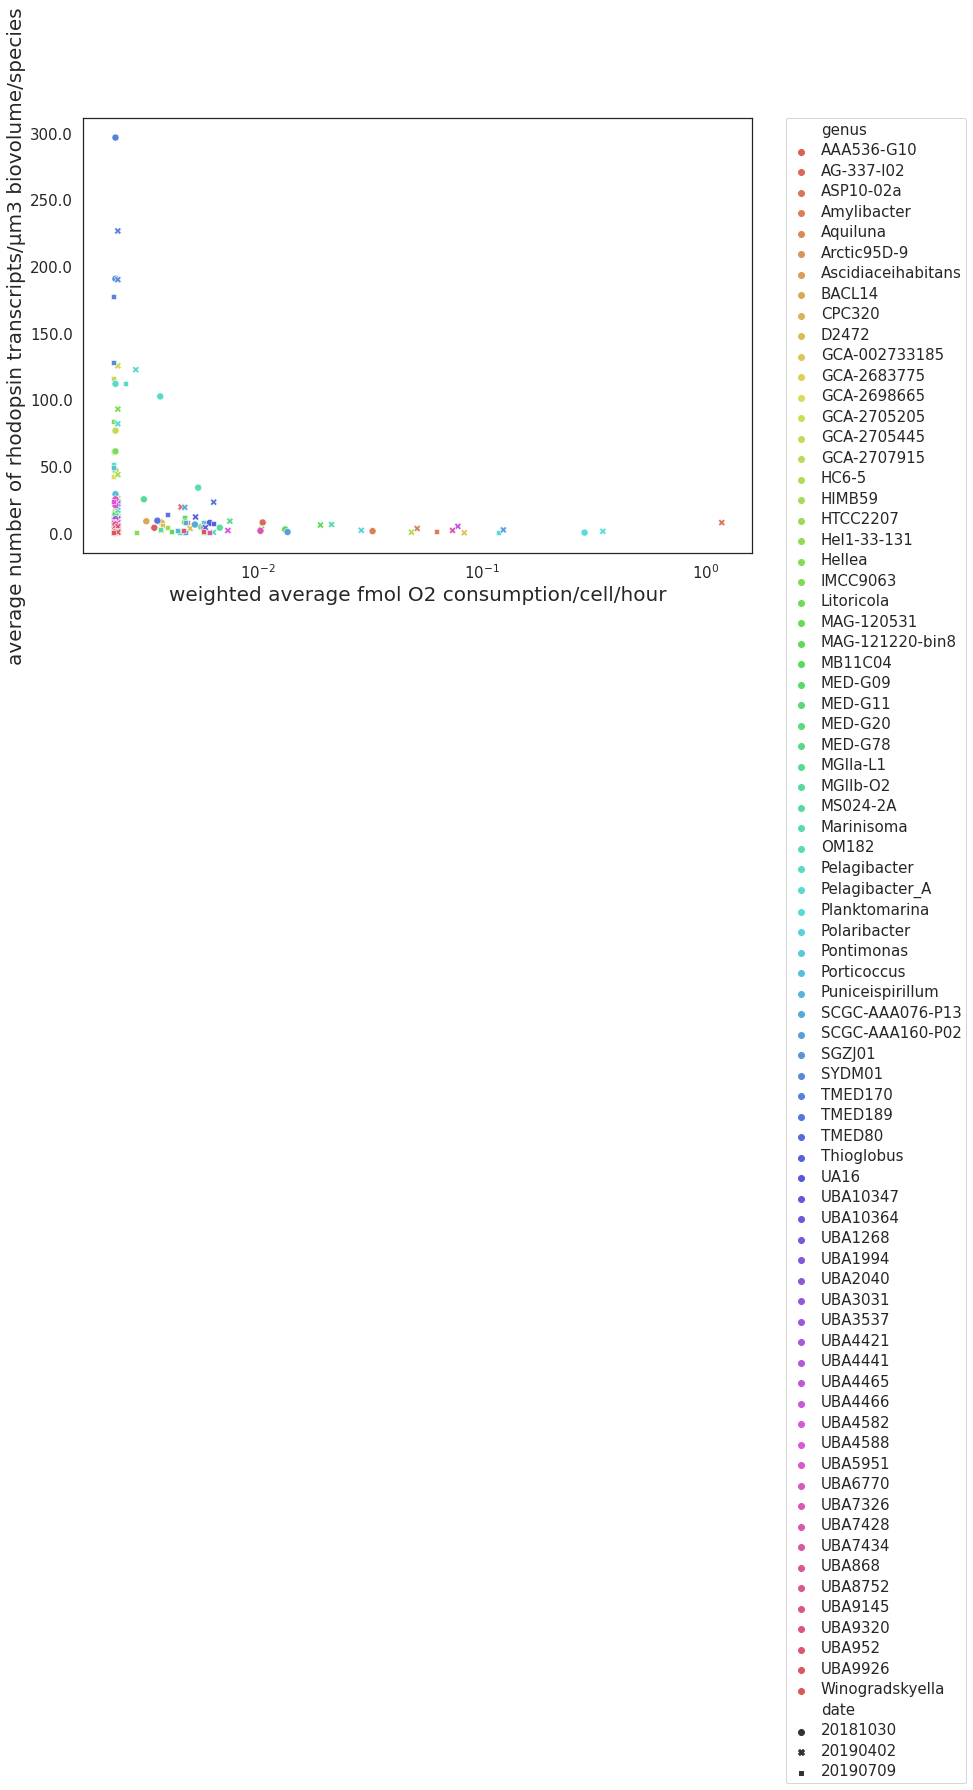

In [21]:
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Energy_pathways/'
plt.figure(figsize=(12,8))
rhodopsin_biovolume=sns.scatterplot(data=data, x="Weighted_avg_O2_consumed_per_cell", 
                     y='rhodopsin_transcripts_per_µm3', style='date', palette='hls', s=50, hue='genus')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.xlabel('weighted average fmol O2 consumption/cell/hour', fontsize=20)
plt.ylabel('average number of rhodopsin transcripts/µm3 biovolume/species', fontsize=20)
sns.set(rc={"figure.figsize":(6, 4)}) #width=3, #height=4
rhodopsin_biovolume.set_yticklabels(rhodopsin_biovolume.get_yticks(), size = 15)
rhodopsin_biovolume.set_xticklabels(rhodopsin_biovolume.get_xticks(), size = 15)

plt.setp(rhodopsin_biovolume.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(rhodopsin_biovolume.get_legend().get_title(), fontsize='25') # for legend title

#rhodopsin_biovolume.set(yscale="log")
#rhodopsin_biovolume.set_xlim(left=0.001, right=5)
rhodopsin_biovolume.set(xscale="log")
#rhodopsin_biovolume.set_ylim(bottom=50, top=5000)
plt.savefig(images+"Rhodopsin_biovolume_O2_consumption.pdf")

In [22]:
data.to_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/csv_files_for_figures/Fig3F_rhodopsin_per_µm.csv')


Text(0.5, 1.0, 'Proteorhodopsin transcripts')

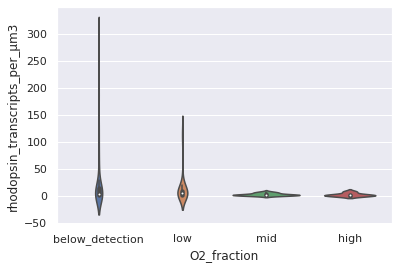

In [23]:
rhod_violin_plt=sns.violinplot(data=data, x='O2_fraction', y='rhodopsin_transcripts_per_µm3')


ax.set(ylabel='log10 average transcripts per µm3')
ax.set(xlabel=' ')
ax.set_title('Proteorhodopsin transcripts')
#fig=violin_plt.get_figure()
#fig.savefig(images+'Violinplot_Rhodopsin_transcripts_above_and_below_O2_detection_limit')